## Data investigation II

Data description: https://s3.amazonaws.com/amazon-reviews-pds/readme.html  
Data dictionary and download: https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt

In [2]:
import json
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, norm, skew, kurtosis

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [5]:
sample = pd.read_csv("data/sample_us.tsv", sep='\t')
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        49 non-null     object
 1   customer_id        49 non-null     int64 
 2   review_id          49 non-null     object
 3   product_id         49 non-null     object
 4   product_parent     49 non-null     int64 
 5   product_title      49 non-null     object
 6   product_category   49 non-null     object
 7   star_rating        49 non-null     int64 
 8   helpful_votes      49 non-null     int64 
 9   total_votes        49 non-null     int64 
 10  vine               49 non-null     object
 11  verified_purchase  49 non-null     object
 12  review_headline    49 non-null     object
 13  review_body        49 non-null     object
 14  review_date        49 non-null     object
dtypes: int64(5), object(10)
memory usage: 5.9+ KB


__DATA COLUMNS:__  
__marketplace__       - 2 letter country code of the marketplace where the review was written.  
__customer_id__       - Random identifier that can be used to aggregate reviews written by a single author.  
__review_id__         - The unique ID of the review.  
__product_id__        - The unique Product ID the review pertains to. In the multilingual dataset the reviews for the same product in different countries can be grouped by the same product_id.  
__product_parent__    - Random identifier that can be used to aggregate reviews for the same product.  
__product_title__     - Title of the product.  
__product_category__  - Broad product category that can be used to group reviews (also used to group the dataset into coherent parts).  
__star_rating__       - The 1-5 star rating of the review.  
__helpful_votes__     - Number of helpful votes.  
__total_votes__       - Number of total votes the review received.  
__vine__              - Review was written as part of the Vine program.  
__verified_purchase__ - The review is on a verified purchase.  
__review_headline__   - The title of the review.  
__review_body__       - The review text.  
__review_date__       - The date the review was written.  

In [9]:
sample['useful'] = sample['helpful_votes'] / sample['total_votes']
sample['useful'] = sample['useful'].fillna(0)

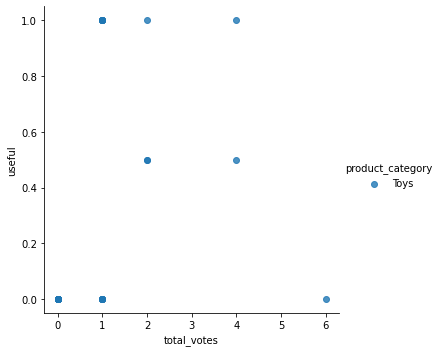

In [12]:
sns.lmplot(x='total_votes', y='useful', data=sample, hue='product_category', fit_reg=False)\
   .set(title='')

plt.show()

In [13]:
sample

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,useful
0,US,18778586,RDIJS7QYB6XNR,B00EDBY7X8,122952789,Monopoly Junior Board Game,Toys,5,0,0,N,Y,Five Stars,Excellent!!!,2015-08-31,0.0
1,US,24769659,R36ED1U38IELG8,B00D7JFOPC,952062646,56 Pieces of Wooden Train Track Compatible wit...,Toys,5,0,0,N,Y,Good quality track at excellent price,Great quality wooden track (better than some o...,2015-08-31,0.0
2,US,44331596,R1UE3RPRGCOLD,B002LHA74O,818126353,Super Jumbo Playing Cards by S&S Worldwide,Toys,2,1,1,N,Y,Two Stars,Cards are not as big as pictured.,2015-08-31,1.0
3,US,23310293,R298788GS6I901,B00ARPLCGY,261944918,Barbie Doll and Fashions Barbie Gift Set,Toys,5,0,0,N,Y,my daughter loved it and i liked the price and...,my daughter loved it and i liked the price and...,2015-08-31,0.0
4,US,38745832,RNX4EXOBBPN5,B00UZOPOFW,717410439,Emazing Lights eLite Flow Glow Sticks - Spinni...,Toys,1,1,1,N,Y,DONT BUY THESE!,Do not buy these! They break very fast I spun ...,2015-08-31,1.0
5,US,13394189,R3BPETL222LMIM,B009B7F6CA,873028700,Melissa & Doug Water Wow Coloring Book - Vehicles,Toys,5,0,0,N,Y,Five Stars,Great item. Pictures pop thru and add detail a...,2015-08-31,0.0
6,US,2749569,R3SORMPJZO3F2J,B0101EHRSM,723424342,Big Bang Cosmic Pegasus (Pegasis) Metal 4D Hig...,Toys,3,2,2,N,Y,Three Stars,"To keep together, had to use crazy glue.",2015-08-31,1.0
7,US,41137196,R2RDOJQ0WBZCF6,B00407S11Y,383363775,Fun Express Insect Finger Puppets 12ct Toy,Toys,5,0,0,N,Y,Five Stars,I was pleased with the product.,2015-08-31,0.0
8,US,433677,R2B8VBEPB4YEZ7,B00FGPU7U2,780517568,Fisher-Price Octonauts Shellington's On-The-Go...,Toys,5,0,0,N,Y,Five Stars,Children like it,2015-08-31,0.0
9,US,1297934,R1CB783I7B0U52,B0013OY0S0,269360126,Claw Climber Goliath/ Disney's Gargoyles,Toys,1,0,1,N,Y,Shame on the seller !!!,Showed up not how it's shown . Was someone's o...,2015-08-31,0.0
